In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2 as cv

In [2]:
# Using CT KIDNEY DATASET: Normal-Cyst-Tumor and Stone / Dataset from Kaggle

In [3]:
root_dir='C:/Users/raidi/OneDrive/Desktop/Python/Dataset/Images Videos/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'

In [4]:
number_of_images={} # Number of images in each class
for dir in os.listdir(root_dir):
    number_of_images[dir]=len(os.listdir(os.path.join(root_dir,dir)))
number_of_images.items()

dict_items([('Cyst', 3709), ('Normal', 5077), ('Stone', 1377), ('Tumor', 2283)])

In [5]:
for i in os.listdir(root_dir): # Frist four image file names present in dataset
    img_path=os.listdir(root_dir + "/" + str(i))
    print(img_path[:5])

['Cyst- (1).jpg', 'Cyst- (10).jpg', 'Cyst- (100).jpg', 'Cyst- (1000).jpg', 'Cyst- (1001).jpg']
['Normal- (1).jpg', 'Normal- (10).jpg', 'Normal- (100).jpg', 'Normal- (1000).jpg', 'Normal- (1001).jpg']
['Stone- (1).jpg', 'Stone- (10).jpg', 'Stone- (100).jpg', 'Stone- (1000).jpg', 'Stone- (1001).jpg']
['Tumor- (1).jpg', 'Tumor- (10).jpg', 'Tumor- (100).jpg', 'Tumor- (1000).jpg', 'Tumor- (1001).jpg']


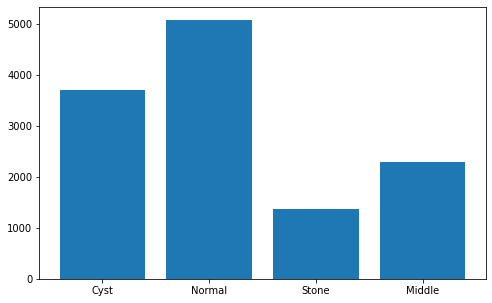

In [6]:
image_count=[] # Visualizing class count
class_name=['Cyst','Normal','Stone','Middle']
for i in os.listdir(root_dir): # Frist four image file names present in our datasets class labels
    img_path=os.listdir(root_dir + "/" + str(i))
    image_count.append(len(img_path))
plt.figure(figsize=(8,5))  
plt.bar(class_name, image_count)
plt.xticks(class_name)
plt.show()  

In [7]:
data=[] # reading images from folder and resizing image size
class_name=[]
for i in os.listdir(root_dir):
    images=os.listdir(root_dir + "/" + str(i))
    for img in images:
        try:
            image=cv.imread(root_dir + '/' + str(i) + "/" + img)
            image= cv.resize(image, (240, 240))
            data.append(image)
            class_name.append(i)
        except:
            print("Error in loading images")

In [8]:
data=np.array(data) #list to array
labels=np.array(class_name)

In [9]:
data=data/255.0 # Scaling/Normalizing image pixels

In [10]:
data[:5],labels[:5],labels[9050]

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le=LabelEncoder()

In [13]:
labels=le.fit_transform(labels) # Categorial to neumerical using labelencoder
labels

array([0, 0, 0, ..., 3, 3, 3], dtype=int64)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=0.2)

In [16]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((9956, 240, 240, 3), (9956,), (2490, 240, 240, 3), (2490,))

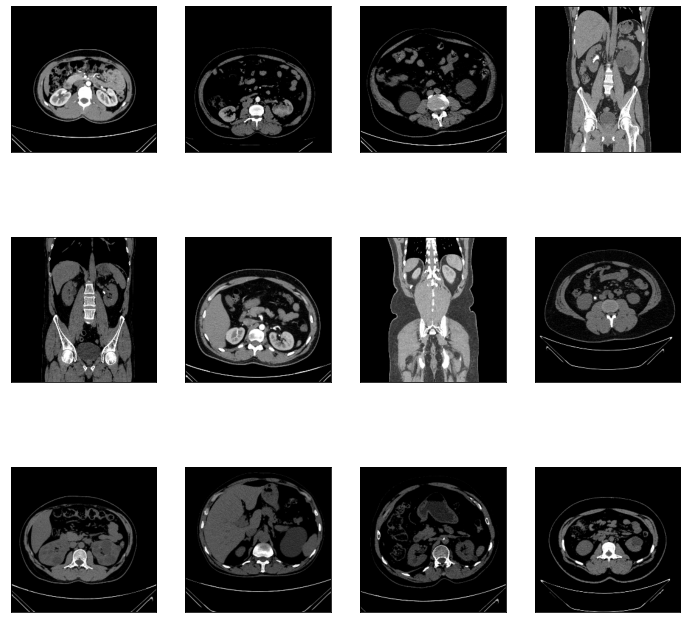

In [17]:
plt.figure(figsize=(12,12))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i])
plt.show()

In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
# Expanding training images by data argumentation using ImageDataGenerator
aug= ImageDataGenerator(
    rotation_range = 20,
    zoom_range = 0.2,
    width_shift_range=0.2,
    height_shift_range=0.2)

In [20]:
# Building convolution model
# initializing by sequential layer
# Added 32 filters of size 5*5 and applying relu as activation function
# Followed by 32 filters of size 3*3
# Maxpooling layer of 2*2 matrix use
# 25% percent of neural network gets deactivated
# similary convultion operation and Maxpooling was done
# Finally flatten output and pass to dense hidden layer of 100 dense neuron and 4 output layer
model=Sequential([
                  Input((240,240,3)),
                  Conv2D(32,(5,5),activation='relu',padding = 'same'),
                  MaxPool2D((2,2)),
                  Dropout(rate = 0.25),

                  Conv2D(128,(2,2),activation='relu'),
                  Conv2D(128,(3,3),activation='relu'),
                  MaxPool2D((2,2)),
                  Dropout(rate = 0.3),
            
                  Flatten(),
                  Dense(100,activation='sigmoid'),
                  Dense(4,activation='softmax')
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 240, 240, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 120, 120, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 120, 120, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 128)     16512     
                                                                 
 conv2d_2 (Conv2D)           (None, 117, 117, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 58, 58, 128)      0         
 2D)                                                    

In [22]:
model.compile(
    loss=SparseCategoricalCrossentropy(),
    optimizer='adam',
    metrics=['accuracy']
)

In [23]:
# Using early stopping
early_stoping = EarlyStopping(
    monitor='val_accuracy',
    patience=0,
    mode='max'
)

In [24]:
# Generationg the model and evaluating the performance of created model

In [25]:
hs = model.fit(aug.flow(X_train,y_train,batch_size=10),epochs=1000,validation_data=(X_test, y_test),callbacks=early_stoping)

Epoch 1/1000
996/996 [==============================] - 921s 923ms/step - loss: 0.9717 - accuracy: 0.6299 - val_loss: 0.9508 - val_accuracy: 0.6438
Epoch 2/1000
996/996 [==============================] - 907s 911ms/step - loss: 0.7922 - accuracy: 0.6957 - val_loss: 0.6815 - val_accuracy: 0.7209


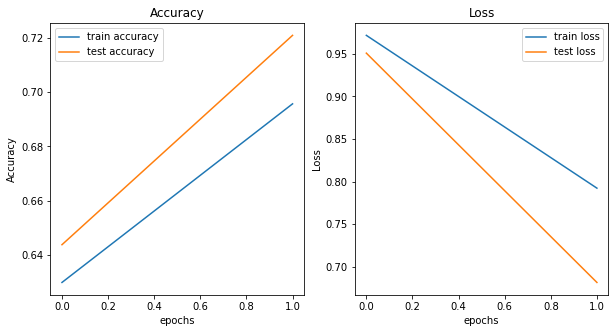

In [26]:
fig, (ax1, ax2)  = plt.subplots(1,2,figsize=(10,5))
ax1.plot(hs.history['accuracy'], label= 'train accuracy')
ax1.plot(hs.history['val_accuracy'], label= 'test accuracy')
ax1.set_title('Accuracy')
ax1.set_xlabel('epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(hs.history['loss'], label= 'train loss')
ax2.plot(hs.history['val_loss'], label= 'test loss')
ax2.set_title('Loss')
ax2.set_xlabel('epochs')
ax2.set_ylabel('Loss')
ax2.legend()

In [27]:
y_pred=model.predict(X_test)
y_pred[:2] # which is an output probability

78/78 [==============================] - 42s 534ms/step


array([[8.4331498e-04, 7.0136487e-01, 9.4145723e-03, 2.8837729e-01],
       [8.4871590e-01, 1.0152826e-02, 9.1423936e-02, 4.9707379e-02]],
      dtype=float32)

In [28]:
y_predicted=np.argmax(y_pred,axis=1)
y_predicted[:2]

array([1, 0], dtype=int64)

In [29]:
from sklearn.metrics import confusion_matrix,classification_report

In [30]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       747
           1       0.74      0.94      0.83       975
           2       0.80      0.28      0.41       265
           3       0.50      0.31      0.38       503

    accuracy                           0.72      2490
   macro avg       0.70      0.60      0.61      2490
weighted avg       0.71      0.72      0.69      2490



In [31]:
y_test[:20]

array([1, 0, 3, 1, 0, 3, 0, 0, 3, 2, 3, 2, 3, 2, 0, 1, 0, 3, 2, 1],
      dtype=int64)

In [32]:
y_predicted[:20]

array([1, 0, 3, 1, 0, 1, 0, 3, 1, 0, 1, 0, 3, 2, 0, 1, 0, 1, 0, 1],
      dtype=int64)

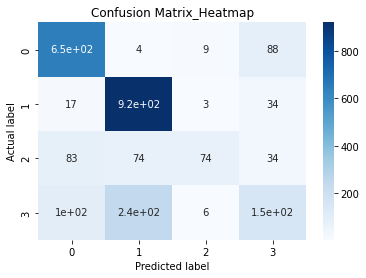

In [33]:
cm=confusion_matrix(y_test,y_predicted )
sns.heatmap(cm,cmap="Blues",annot=True)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix_Heatmap')
plt.show()